# 08 Visualisation de Données avec Seaborn

- 1 seule ligne de code
- graphiques ultra complexes si besoin

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
iris = sns.load_dataset('iris')
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
30,4.8,3.1,1.6,0.2,setosa
94,5.6,2.7,4.2,1.3,versicolor
128,6.4,2.8,5.6,2.1,virginica
43,5.0,3.5,1.6,0.6,setosa
146,6.3,2.5,5.0,1.9,virginica


## 1. Pairplot() : La vue d'ensemble

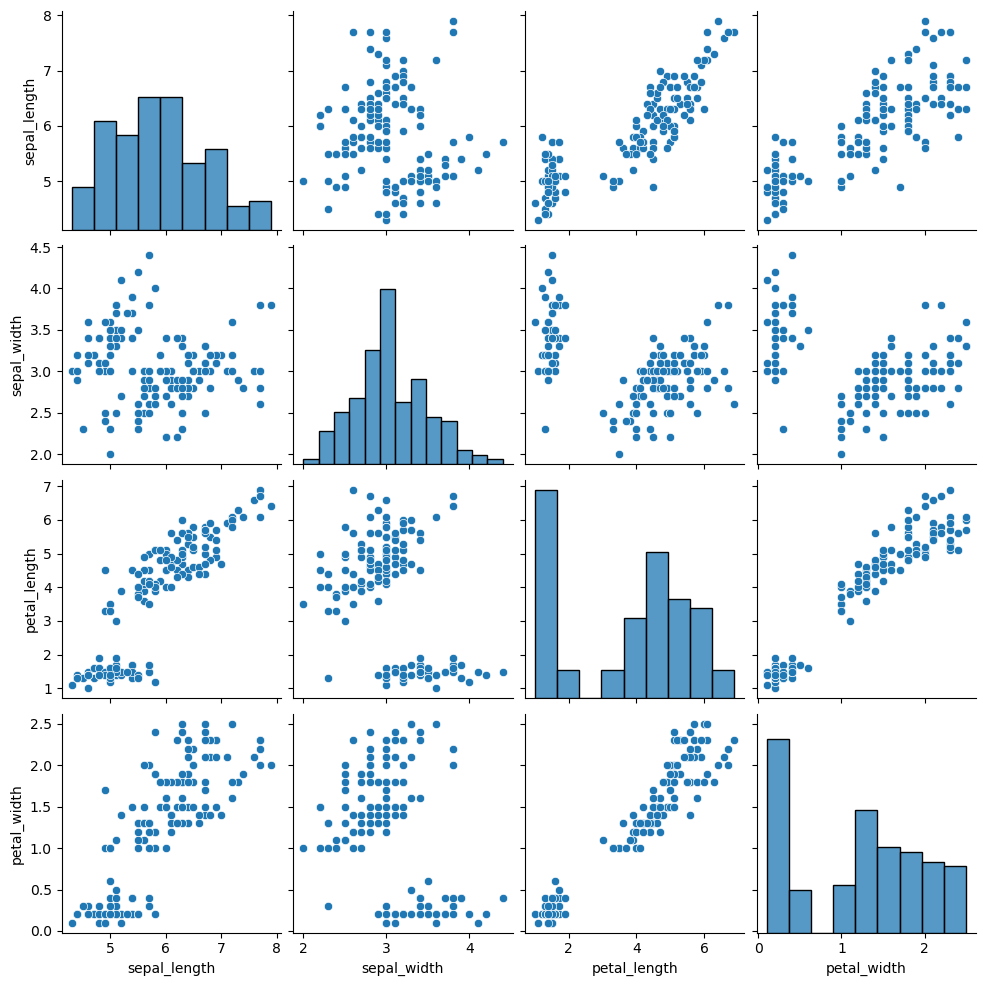

In [10]:
sns.pairplot(iris) # on voit 2 distrib normal (diagonale) puis 2 disbrib anormales (petal width)

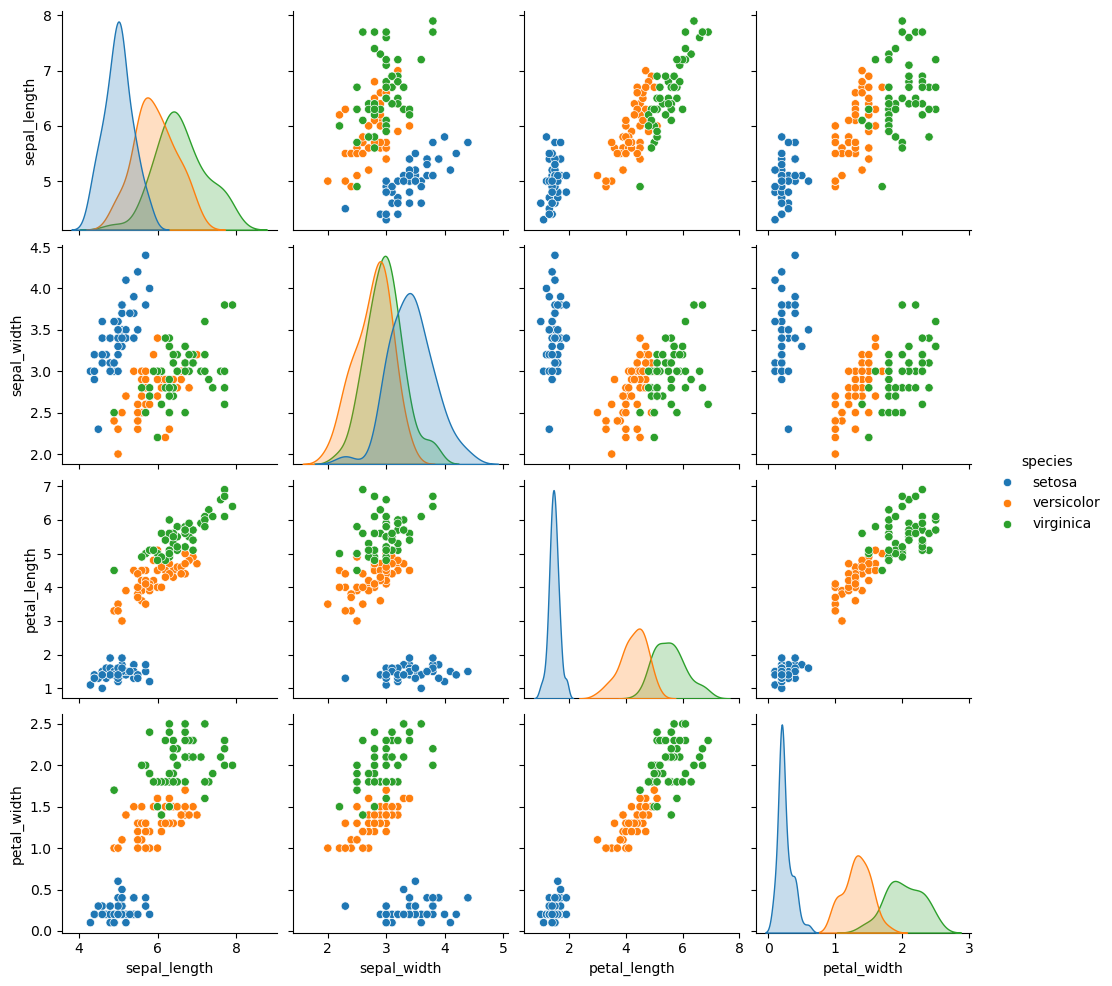

In [12]:
# now par variété d'iris
sns.pairplot(iris, hue='species') # voir toutes les relations entre nos différentes varaibles

## 2. Visualiser de catégories

In [14]:
titanic = sns.load_dataset('titanic')
titanic.drop(['alone', 'alive', 'who', 'adult_male', 'embark_town', 'class'], axis=1, inplace=True)
titanic.dropna(axis=0, inplace=True)
titanic.head() # sibsp = nbre de parents à bord (sauf enfants), parch = avec enfants, fare = prix du billet, embarked = port d'embarquement, deck=pont

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
1,1,1,female,38.0,1,0,71.2833,C,C
3,1,1,female,35.0,1,0,53.1000,S,C
6,0,1,male,54.0,0,0,51.8625,S,E
10,1,3,female,4.0,1,1,16.7000,S,G
11,1,1,female,58.0,0,0,26.5500,S,C


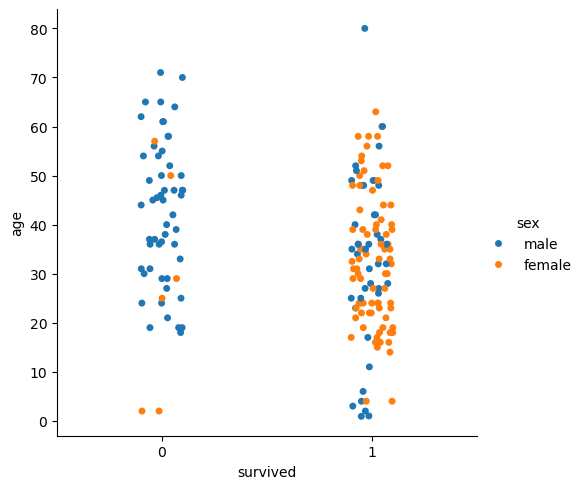

In [21]:
sns.catplot(x='survived', y='age', data=titanic, hue='sex')

In [ ]:
# sns.pairplot(data=titanic, hue='sex') # testable meme si catégories mais peu utile car bcp cols bianires

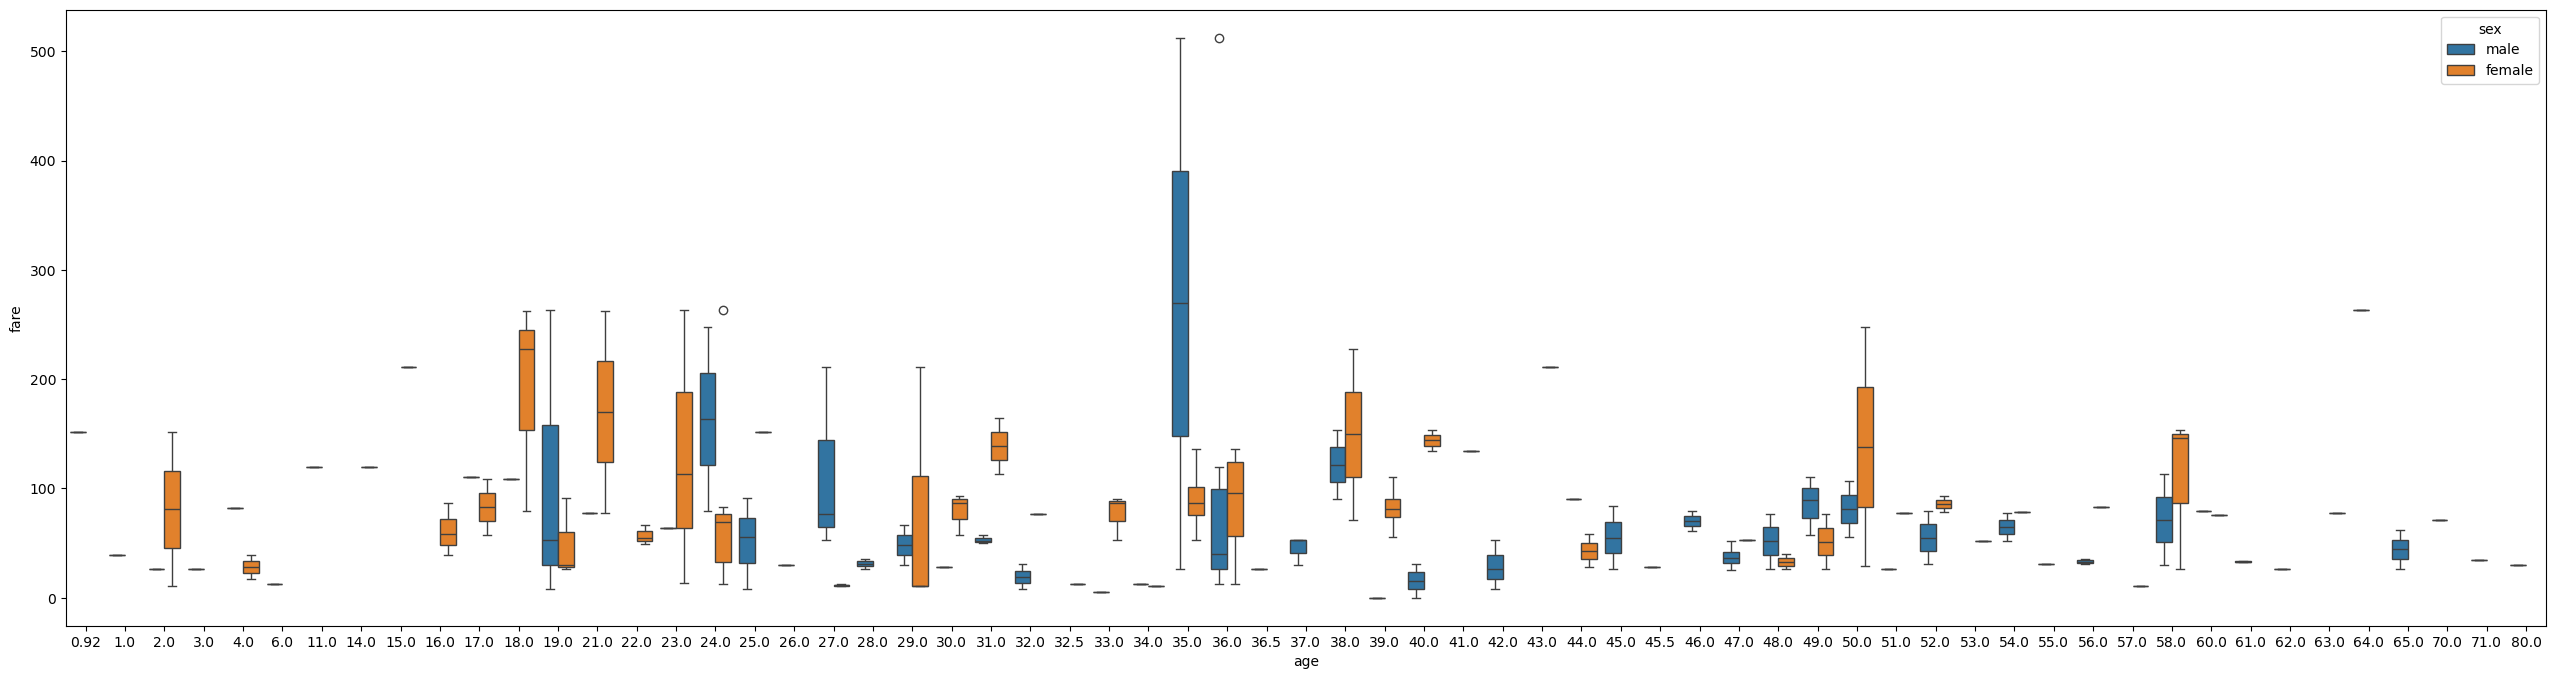

In [25]:
plt.figure(figsize=(32, 8))
sns.boxplot(x='age', y='fare', data=titanic, hue='sex')
# Sauvegarder le graphique dans un fichier image
plt.savefig('data/boxplot_titanic.png', dpi=300)

## 3. Visualisation de Distributions

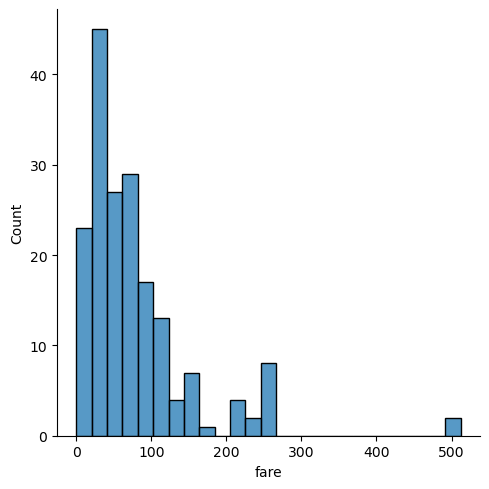

In [28]:
sns.displot(titanic['fare'])

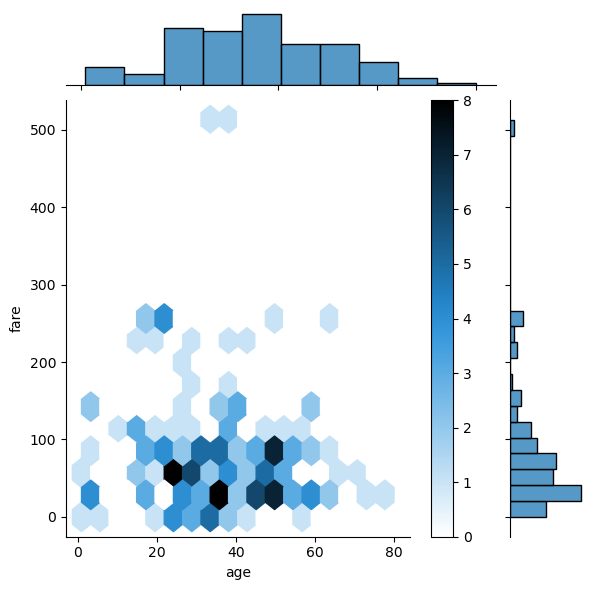

In [40]:

sns.jointplot(data=titanic, x='age', y='fare', kind='hex')
plt.colorbar()

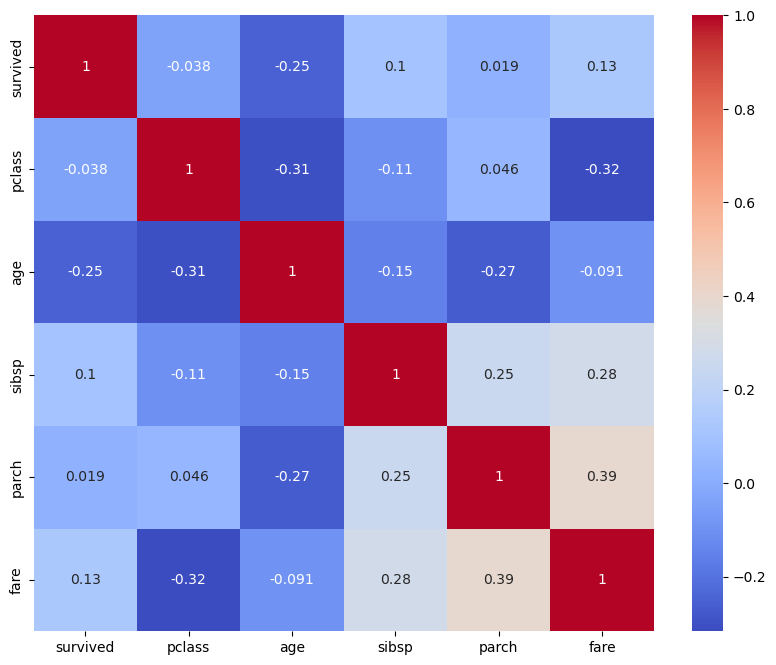

In [42]:
# Sélectionner uniquement les colonnes numériques
numeric_titanic = titanic.select_dtypes(include='number') # une heatmap ne se fait que sur des colonnes numériques !

# Calculer la corrélation et tracer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_titanic.corr(), annot=True, cmap="coolwarm")

# Afficher le graphique
plt.show()

In [ ]:
## Convertir les colonnes non numériques

In [44]:
# Convertir les colonnes catégorielles en variables numériques
titanic_numeric = pd.get_dummies(titanic)
titanic_numeric

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
1,1,1,38.0,1,0,71.2833,True,False,True,False,False,False,False,True,False,False,False,False
3,1,1,35.0,1,0,53.1000,True,False,False,False,True,False,False,True,False,False,False,False
6,0,1,54.0,0,0,51.8625,False,True,False,False,True,False,False,False,False,True,False,False
10,1,3,4.0,1,1,16.7000,True,False,False,False,True,False,False,False,False,False,False,True
11,1,1,58.0,0,0,26.5500,True,False,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,47.0,1,1,52.5542,True,False,False,False,True,False,False,False,True,False,False,False
872,0,1,33.0,0,0,5.0000,False,True,False,False,True,False,True,False,False,False,False,False
879,1,1,56.0,0,1,83.1583,True,False,True,False,False,False,False,True,False,False,False,False
887,1,1,19.0,0,0,30.0000,True,False,False,False,True,False,True,False,False,False,False,False


<Axes: >

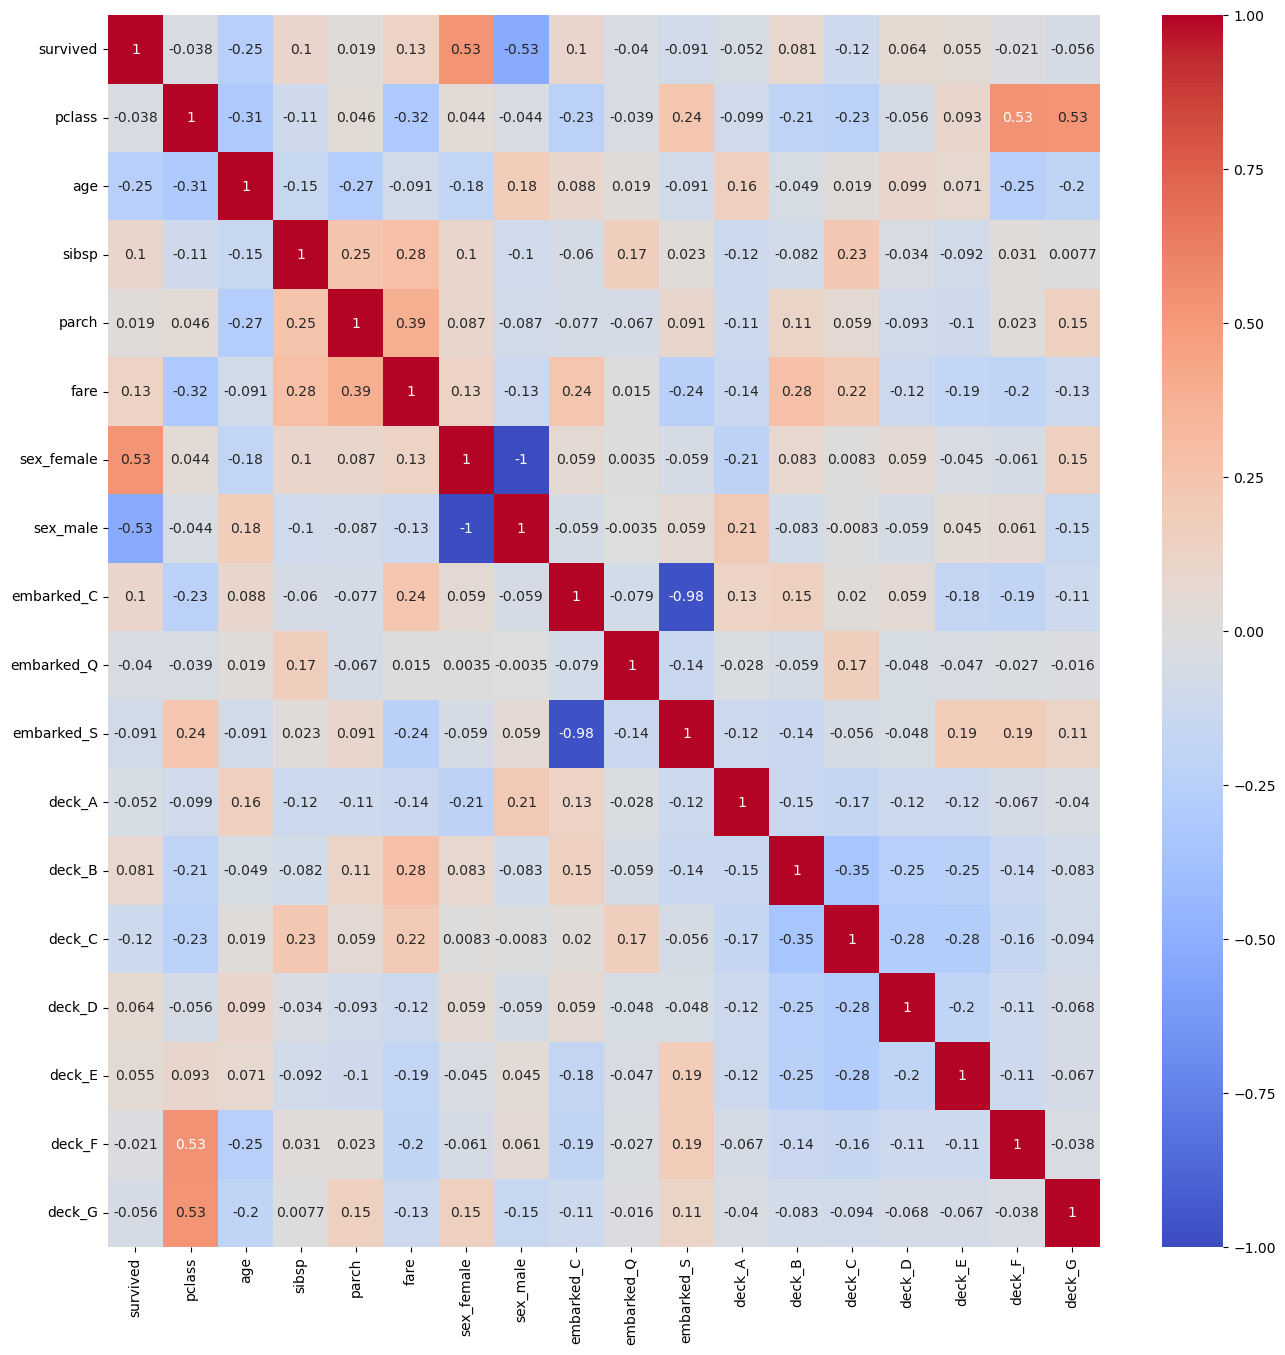

In [46]:
# Calculer la corrélation sur les données transformées
plt.figure(figsize=(16, 16))
sns.heatmap(titanic_numeric.corr(), annot=True, cmap='coolwarm')